In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('C:/Users/nigam/Downloads/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
import numpy as np

z_scores = np.abs((X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0))
X_clean = X_scaled[(z_scores < 3).all(axis=1)]


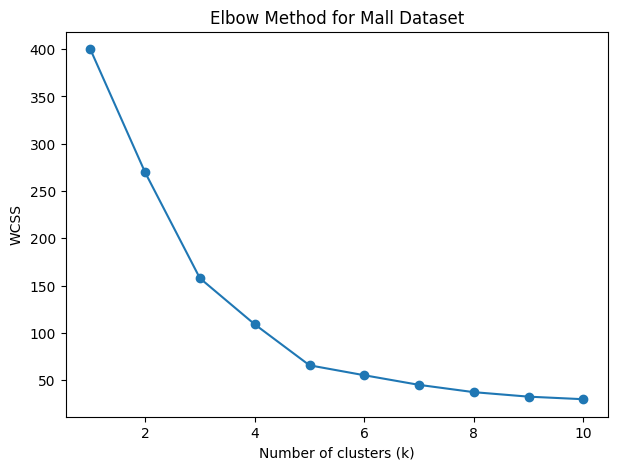

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, random_state=42)
    kmeans.fit(X_clean)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Mall Dataset")
plt.show()


In [8]:
print(wcss)

[400.0, 269.6910121927639, 157.70400815035947, 108.92131661364355, 65.56840815571681, 55.057348270385994, 44.86475569922557, 37.14811697229111, 32.39226763033116, 29.685787841036316]


In [9]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

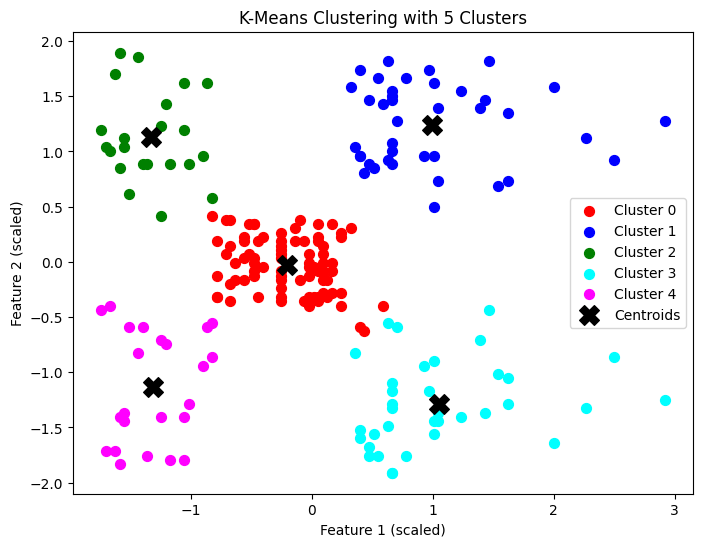

In [10]:
colors = ['red','blue','green','cyan','magenta','orange']

plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X_scaled[clusters == i, 0],
                X_scaled[clusters == i, 1],
                s=50,
                c=colors[i],
                label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, c='black', marker='X', label='Centroids')

plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title(f"K-Means Clustering with {k} Clusters")
plt.legend()
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler

X_simple = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_simple)


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)


df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]


In [14]:
from sklearn.cluster import KMeans

k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  
df['Cluster'] = clusters

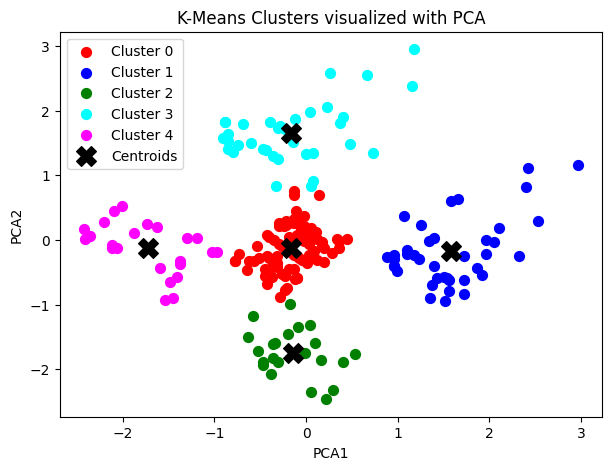

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
colors = ['red','blue','green','cyan','magenta','orange']

for i in range(k):
    plt.scatter(df.loc[df['Cluster']==i, 'PCA1'],
                df.loc[df['Cluster']==i, 'PCA2'],
                s=50, c=colors[i], label=f'Cluster {i}'
    )
centers_pca = pca.transform(kmeans.cluster_centers_) 
plt.scatter(centers_pca[:,0], centers_pca[:,1],
            s=200, c='black', marker='X', label='Centroids')

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("K-Means Clusters visualized with PCA")
plt.legend()
plt.show()

In [16]:
kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=20,
    random_state=42
)

clusters = kmeans.fit_predict(X_pca)


In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, clusters)
print("Silhouette Score for k=5:", score)


Silhouette Score for k=5: 0.5546571631100179


In [29]:
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

k = 2, Silhouette Score = 0.397
k = 3, Silhouette Score = 0.467
k = 4, Silhouette Score = 0.494
k = 5, Silhouette Score = 0.555
k = 6, Silhouette Score = 0.514
k = 7, Silhouette Score = 0.502
k = 8, Silhouette Score = 0.455
k = 9, Silhouette Score = 0.457
k = 10, Silhouette Score = 0.445


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)


In [7]:
kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=20,
    random_state=42
)

clusters = kmeans.fit_predict(X_pca)


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'Annual Income (k$)']].copy()


X = pd.get_dummies(X, drop_first=True)  


y = df['Cluster']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [20]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}


svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}


In [21]:

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best RF params:", rf_grid.best_params_)
print("Best RF score:", rf_grid.best_score_)


svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("Best SVM params:", svm_grid.best_params_)
print("Best SVM score:", svm_grid.best_score_)


knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("Best KNN params:", knn_grid.best_params_)
print("Best KNN score:", knn_grid.best_score_)


Best RF params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best RF score: 0.81875
Best SVM params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM score: 0.80625
Best KNN params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN score: 0.7875


In [22]:
from sklearn.metrics import accuracy_score, classification_report


y_pred_rf = rf_grid.best_estimator_.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.775
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.50      0.80      0.62         5
           2       0.67      0.67      0.67         3
           3       1.00      0.55      0.71        11
           4       1.00      0.67      0.80         3

    accuracy                           0.78        40
   macro avg       0.80      0.72      0.73        40
weighted avg       0.83      0.78      0.77        40



In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


rf = RandomForestClassifier(random_state=42)


param_dist = {
    'n_estimators': np.arange(200, 501, 50),   
    'max_depth': [None, 8, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2']
}

rand_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=50, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1
)


rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_
print("Best hyperparameters:", rand_search.best_params_)

y_pred = best_rf.predict(X_test)
print("Accuracy after RandomizedSearchCV:", accuracy_score(y_test, y_pred))


Best hyperparameters: {'n_estimators': np.int64(450), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 8}
Accuracy after RandomizedSearchCV: 0.775


In [24]:
df_features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


df_features['Income_Spending'] = df_features['Annual Income (k$)'] * df_features['Spending Score (1-100)']
df_features['Age_Spending'] = df_features['Age'] * df_features['Spending Score (1-100)']
df_features['Age_Income'] = df_features['Age'] * df_features['Annual Income (k$)']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)
y = df['Cluster']  

C:\Users\nigam\AppData\Local\Temp\ipykernel_9820\912278114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['Income_Spending'] = df_features['Annual Income (k$)'] * df_features['Spending Score (1-100)']
C:\Users\nigam\AppData\Local\Temp\ipykernel_9820\912278114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['Age_Spending'] = df_features['Age'] * df_features['Spending Score (1-100)']
C:\Users\nigam\AppData\Local\Temp\ipykernel_9820\912278114.py:6: SettingWithCopyWarning: 
A va

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


param_dist = {
    'n_estimators': np.arange(200, 501, 50),
    'max_depth': [None, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2']
}

rf = RandomForestClassifier(random_state=42)
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5,
                                 scoring='accuracy', random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy after feature engineering:", accuracy_score(y_test, y_pred))
print("Best hyperparameters:", rand_search.best_params_)


Accuracy after feature engineering: 0.975
Best hyperparameters: {'n_estimators': np.int64(450), 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 8}


In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [38]:

new_customer = np.array([[23, 46]])


new_customer_scaled = scaler.transform(new_customer)


cluster = kmeans.predict(new_customer_scaled)

print("Customer belongs to cluster:", cluster[0])


Customer belongs to cluster: 4


c:\Users\nigam\OneDrive\Desktop\New folpractice 2der\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:

new_customer = np.array([[99, 55]])


new_customer_scaled = scaler.transform(new_customer)


cluster = kmeans.predict(new_customer_scaled)

print("Customer belongs to cluster:", cluster[0])


Customer belongs to cluster: 1


c:\Users\nigam\OneDrive\Desktop\New folpractice 2der\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2,Cluster
0,1,Male,19,15,39,-1.537109,-0.922207,4
1,2,Male,21,15,81,-0.384168,-2.075149,2
2,3,Female,20,16,6,-2.416002,0.010665,4
3,4,Female,23,16,77,-0.466982,-1.938355,2
4,5,Female,31,17,40,-1.455678,-0.895678,4


In [48]:
df[df['Cluster'] == 3]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2,Cluster
124,125,Female,23,70,29,-0.327177,0.836745,3
128,129,Male,59,71,11,-0.794305,1.357853,3
130,131,Male,47,71,9,-0.849207,1.412755,3
134,135,Male,20,73,5,-0.905031,1.576539,3
136,137,Female,44,73,7,-0.850129,1.521637,3
138,139,Male,19,74,10,-0.740786,1.466273,3
140,141,Female,57,75,5,-0.851051,1.630518,3
144,145,Male,25,77,12,-0.604914,1.492341,3
146,147,Male,48,77,36,0.053909,0.833517,3
148,149,Female,34,78,22,-0.303415,1.244821,3


In [49]:
df_clean = df.copy()


In [50]:
for i in range(kmeans.n_clusters):
    count = (df_clean['Cluster'] == i).sum()
    print(f"Cluster {i} has {count} customers")

Cluster 0 has 81 customers
Cluster 1 has 39 customers
Cluster 2 has 22 customers
Cluster 3 has 35 customers
Cluster 4 has 23 customers


In [53]:
df_clean[df_clean['Cluster'] == 4]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2,Cluster
0,1,Male,19,15,39,-1.537109,-0.922207,4
2,3,Female,20,16,6,-2.416002,0.010665,4
4,5,Female,31,17,40,-1.455678,-0.895678,4
6,7,Female,35,18,6,-2.362022,0.064645,4
8,9,Male,64,19,3,-2.417385,0.173988,4
10,11,Male,67,19,14,-2.115424,-0.127973,4
12,13,Female,58,20,15,-2.060984,-0.128434,4
14,15,Male,37,20,13,-2.115886,-0.073532,4
16,17,Female,35,21,35,-1.484974,-0.650464,4
18,19,Male,52,23,29,-1.595700,-0.431778,4


In [46]:
kmeans.n_clusters


5